# Customer Chrurn Prediction
* Classification metrics - Accuracy, F1-Score, Recall, Precison
* Steps: 
    1. Data loading
    2. EDA
    3. Data splitting and preparation
    4. Model Selection - Logistic Regression and Random Forest
    5. Model Training - GridSearchCV (Hyperparameter tuning)
    6. Model testing
    7. Comparing results

In [1]:
import pandas as pd
import numpy as np

### Data loading

In [2]:
df=pd.read_csv("Churn-Data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploratory Data Analysis (EDA)

In [3]:
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [5]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### Clearly there is an imbalance in output variable

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### There are no missing values in our dataset, but there is a need to convert categorical variables/columns to numbers

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Label encode binary categorical columns
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_columns:
    df[col] = le.fit_transform(df[col])

# One-hot encode categorical columns with more than two categories
categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges TotalCharges  ...  \
0             0                 1           29.85        29.85  ...   
1             1                 0           56.95       1889.5  ...   
2             1                 1           53.85       108.15  ...   
3             0                 0           42.30      1840.75  ...   
4             1                 1           70.70       151.65  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0                0                                0                0   
1             

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   PaperlessBilling                       7043 non-null   int64  
 8   MonthlyCharges                         7043 non-null   float64
 9   TotalCharges                           7043 non-null   object 
 10  Churn                                  7043 non-null   int64  
 11  Mult

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   PaperlessBilling                       7043 non-null   int64  
 8   MonthlyCharges                         7043 non-null   float64
 9   TotalCharges                           7032 non-null   float64
 10  Churn                                  7043 non-null   int64  
 11  Mult

#### Total charges seems to contain 10 NaN values, we need to fix that

In [13]:
df['TotalCharges'].fillna(0, inplace=True)
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [14]:
numeric_df = df[['MonthlyCharges','TotalCharges','tenure']]

# Descriptive statistics for numeric columns
desc_stats = numeric_df.describe()
print(desc_stats)

# Range calculation for numeric columns
range_values = numeric_df.max() - numeric_df.min()
print('Range of each numeric feature:')
print(range_values)

       MonthlyCharges  TotalCharges       tenure
count     7043.000000   7043.000000  7043.000000
mean        64.761692   2279.734304    32.371149
std         30.090047   2266.794470    24.559481
min         18.250000      0.000000     0.000000
25%         35.500000    398.550000     9.000000
50%         70.350000   1394.550000    29.000000
75%         89.850000   3786.600000    55.000000
max        118.750000   8684.800000    72.000000
Range of each numeric feature:
MonthlyCharges     100.5
TotalCharges      8684.8
tenure              72.0
dtype: float64


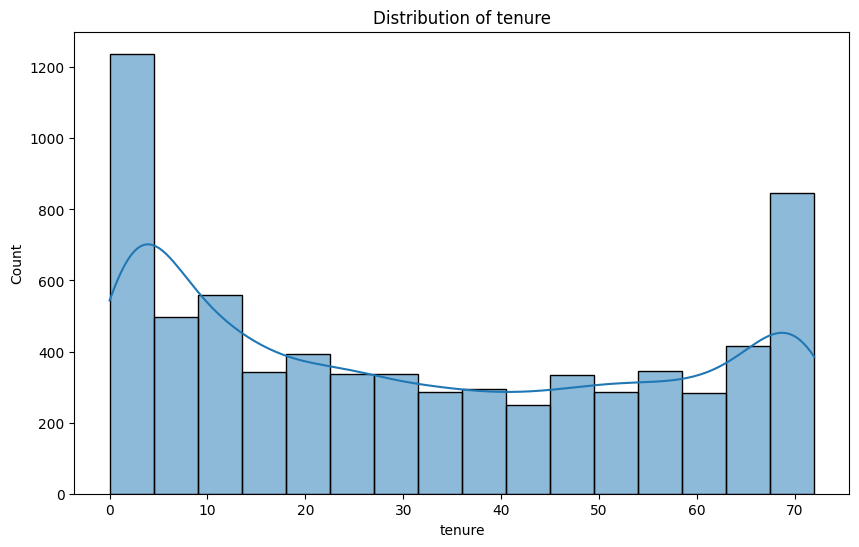

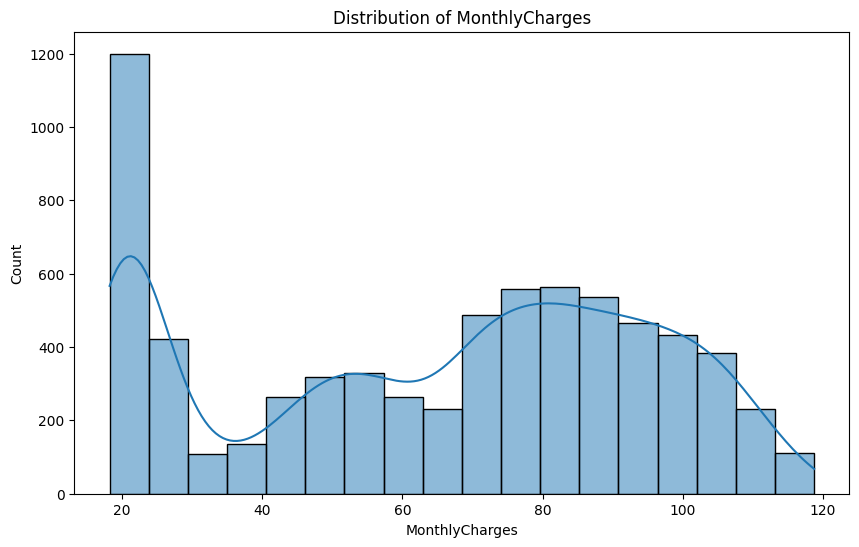

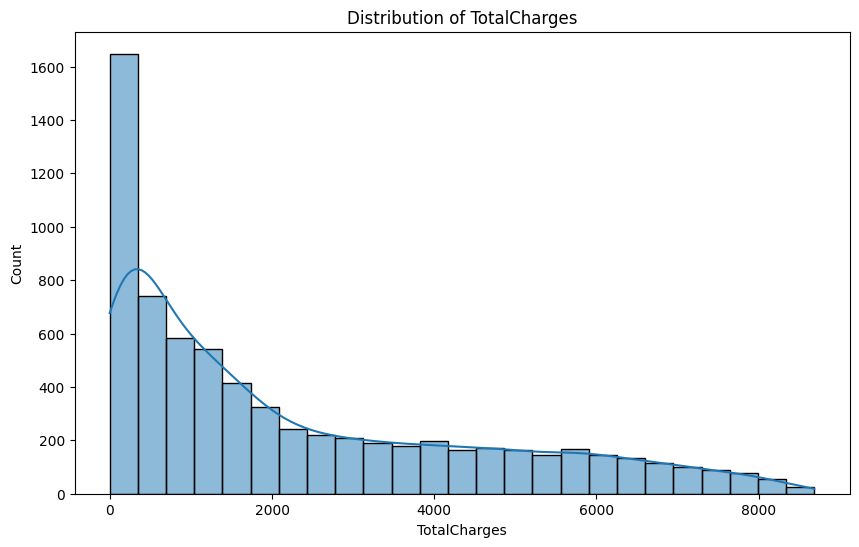

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
for column in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

###  Understanding distribution

* TotalCharges Distribution: The histogram shows that many customers have low TotalCharges, with a significant number of customers having charges close to zero. This could indicate a large proportion of new customers. The distribution is right-skewed, indicating that while most customers have lower charges, a few have very high charges.

* MonthlyCharges Distribution: The histogram indicates a somewhat uniform distribution with peaks at various intervals. A significant number of customers are at the lower end of the monthly charges spectrum, and there are smaller peaks at various points, suggesting a diverse customer base in terms of monthly spending.

* Tenure Distribution: The histogram shows a high number of customers with very low tenure (new customers) and another peak at the higher end, indicating long-term customers. The distribution is bimodal, suggesting two distinct groups: new customers and long-term customers.

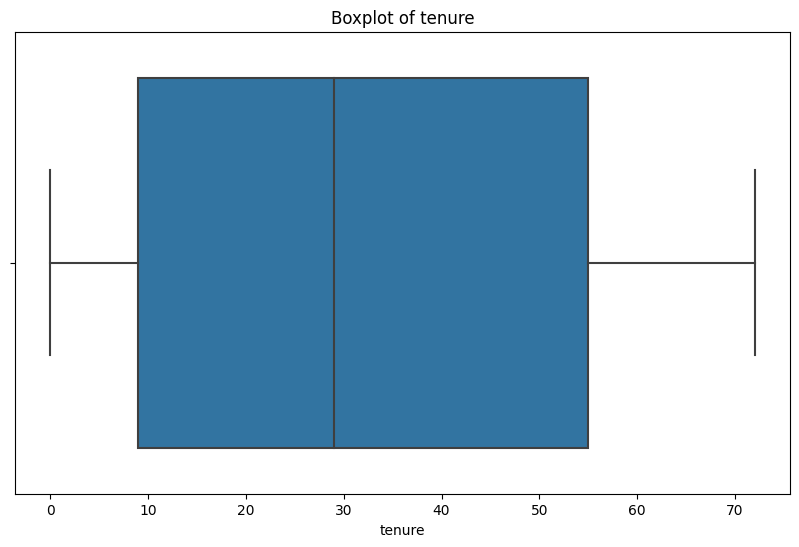

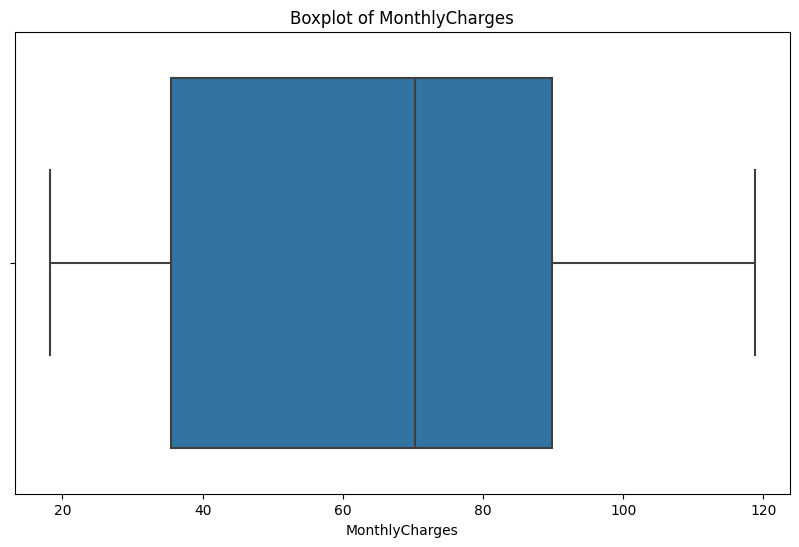

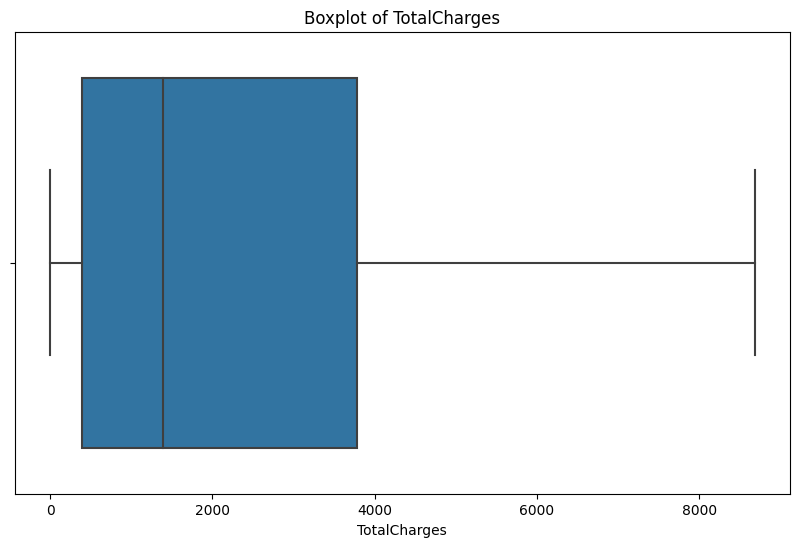

In [16]:
# Plot boxplots to identify outliers
for column in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


C:\Users\Ajinkya\AppData\Local\Temp\ipykernel_5280\837453170.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


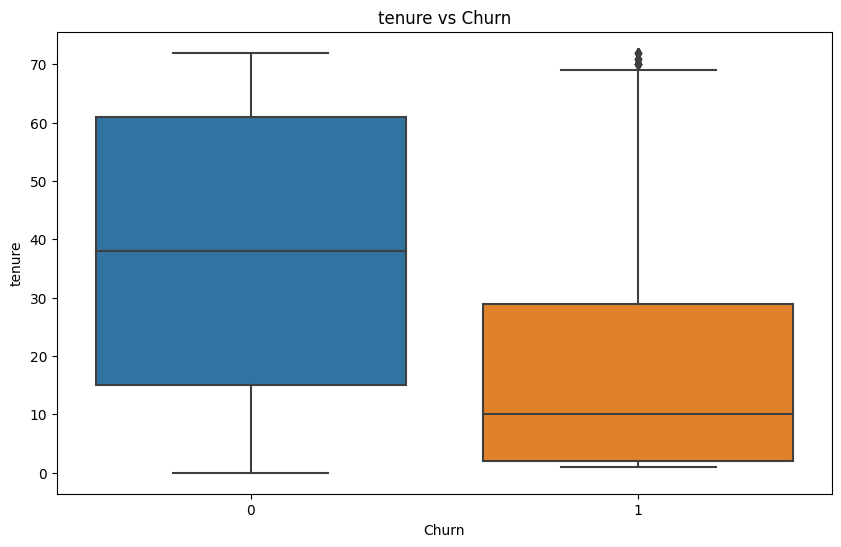

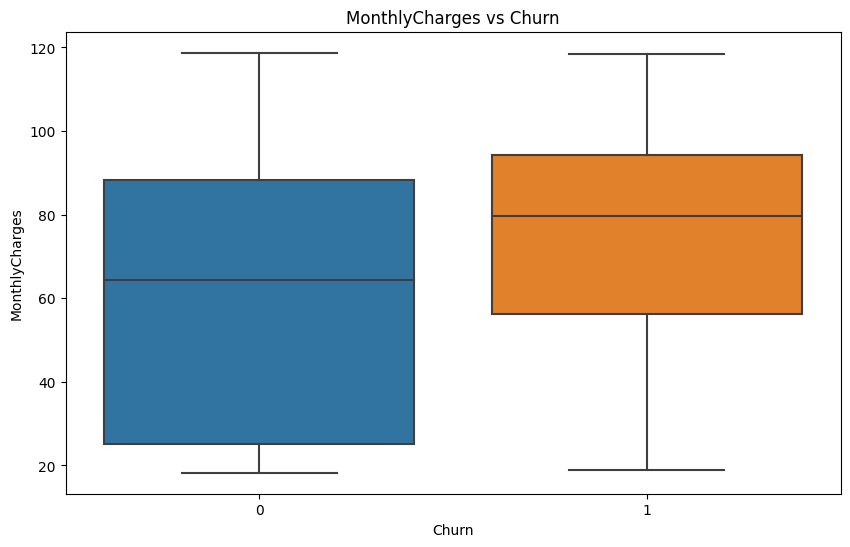

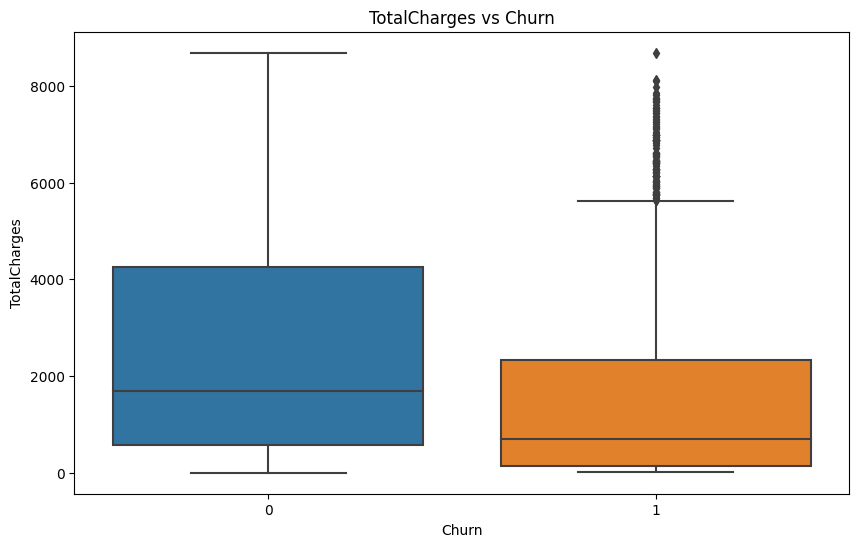

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


In [18]:
correlation_matrix = df.corr()

# Visualize relationships between numerical features and Churn
for column in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=df[column], data=df)
    plt.title(f'{column} vs Churn')
    plt.show()

# Calculate correlation with Churn
print(correlation_matrix['Churn'].sort_values(ascending=False))

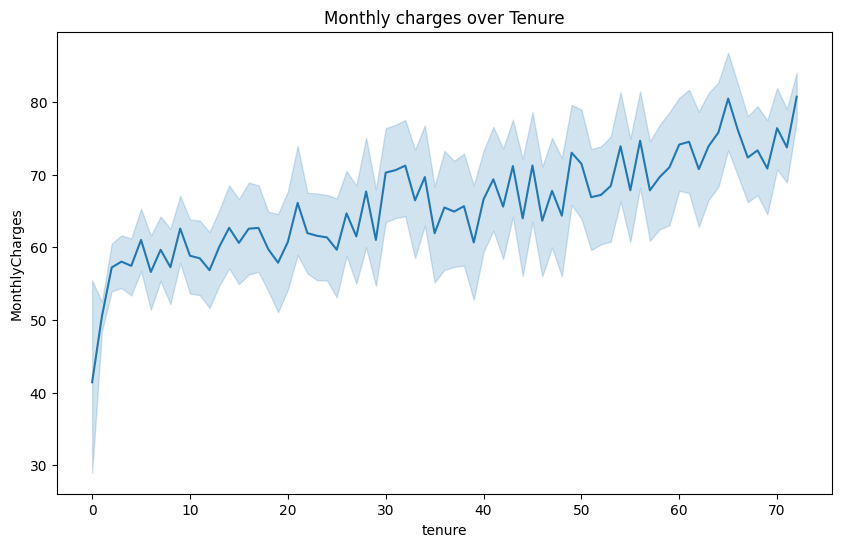

In [19]:
# If tenure can be considered a time series
plt.figure(figsize=(10, 6))
sns.lineplot(x='tenure', y='MonthlyCharges', data=df)
plt.title('Monthly charges over Tenure')
plt.show()

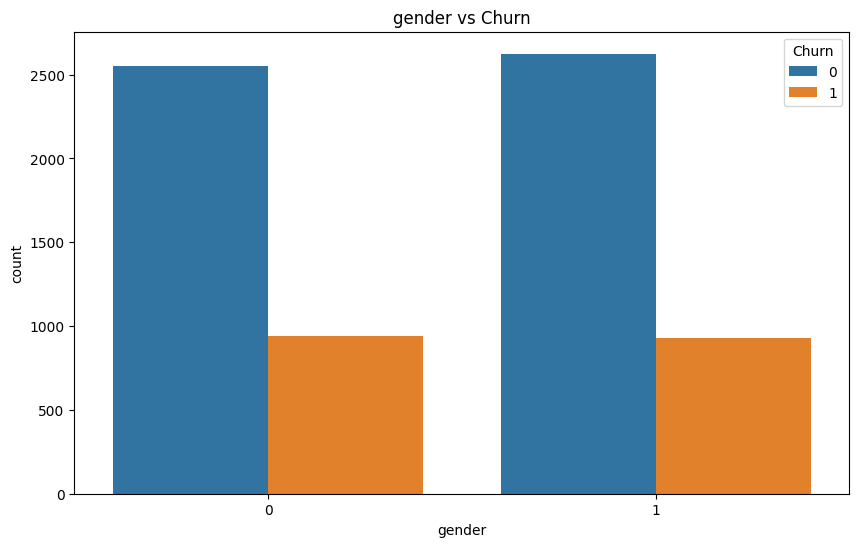

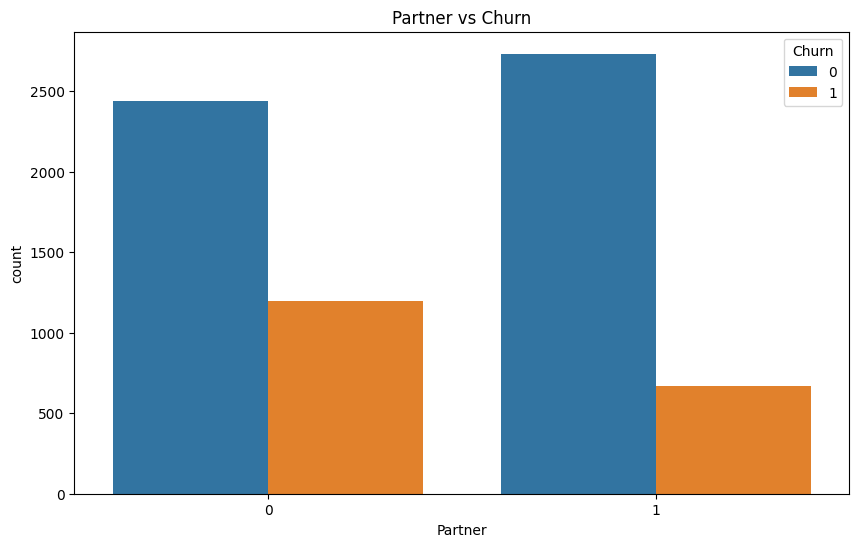

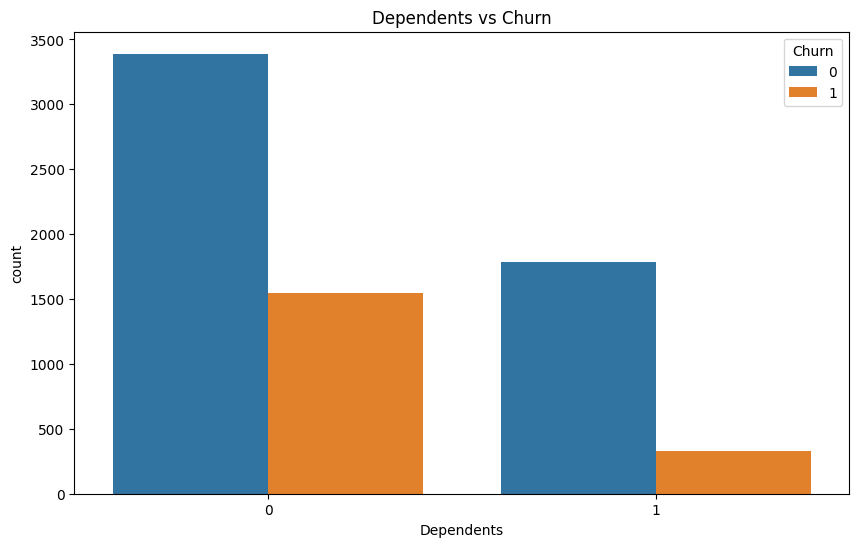

In [21]:
# Visualize variation across categories
for column in ['gender', 'Partner', 'Dependents']:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Churn', data=df)
    plt.title(f'{column} vs Churn')
    plt.show()

### Data splitting

In [22]:
#Split into X and y
from sklearn.model_selection import train_test_split

X=df.drop(["customerID","Churn"],axis=1)
y=df["Churn"]

#Split into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [23]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((5634, 30), (1409, 30), (5634,), (1409,))

### Importing libraries for model training and testing

In [24]:
#Models from Sci-Kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

### Model building, Fitting, Testing - GridSearchCV Logistic regression (Before applying SMOTE)
* {'C': 0.008531678524172805,
  'max_iter': 1000,
  'penalty': 'l2',
  'solver': 'liblinear'} Hyper-parameters set after rigorous experimentation
* accuracy - 0.7950310559006211
* Precision: 0.69
* Recall: 0.55
* F1 Score: 0.61

In [25]:
# Different Hyperparameters for LR model
log_reg_grid = {
    'C': [0.008531678524172805],
    'solver': ['liblinear'],
    'penalty': ['l2'],
    'max_iter': [1000,1200,1500]
}

# Setup grid Hyperparamter search for logistic Regression()
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose = True)

#Fit our grid Hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.008531678524172805],
                         'max_iter': [1000, 1200, 1500], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             verbose=True)

In [26]:
# Check the best hyper-parameters
gs_log_reg.best_params_

{'C': 0.008531678524172805,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [27]:
# Evaluate the grid search logistic regression model
LR_score = gs_log_reg.score(X_test,y_test)
LR_score

0.8147622427253371

In [28]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

#### Visualising Confusion matrix

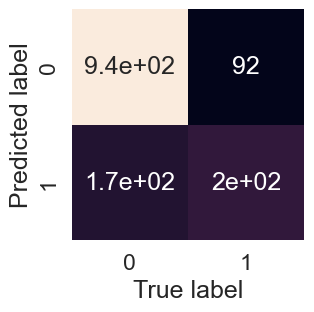

In [31]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True, cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test,y_preds)

In [32]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



In [33]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

# Print the scores
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.69
Recall: 0.55
F1 Score: 0.61


### Applying SMOTE

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

In [36]:
y_train_smote.value_counts()

0    4138
1    4138
Name: Churn, dtype: int64

### Model building, Fitting, Testing - GridSearchCV Logistic regression (After applying SMOTE)
* Precision: 0.56
* Recall: 0.74
* F1 Score: 0.64
* Accuracy: 0.78

In [38]:
# Different Hyperparameters for LR model
log_reg_grid = {
    'C': [0.008531678524172805],
    'solver': ['liblinear'],
    'penalty': ['l2'],
}

# Setup grid Hyperparamter search for logistic Regression()
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose = True)

#Fit our grid Hyperparameter search model
gs_log_reg.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = gs_log_reg.predict(X_test)
LR_score = gs_log_reg.score(X_test,y_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the scores
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {LR_score:.2f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Precision: 0.56
Recall: 0.74
F1 Score: 0.64
Accuracy: 0.78


#### Visualising Confusion matrix

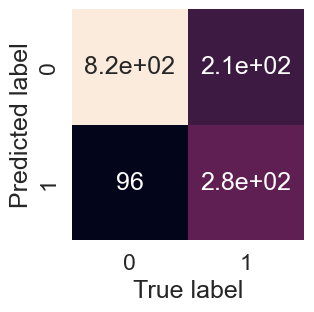

In [39]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True, cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test,y_pred)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1036
           1       0.56      0.74      0.64       373

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409



#### Applying SMOTE has balanced the dataset and improved the model's ability to correctly identify the minority class (Class 1), though with a slight decrease in overall accuracy and performance on the majority class. This trade-off is generally acceptable in imbalanced datasets as it leads to a more balanced and fair model performance across classes.

### Building, fitting, testing - GridSearchCV Random Forest (Before applying SMOTE)
* {'max_depth': 10,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 200} Hyper-parameters set after rigorous experimentation
* Precision: 0.76
* Recall: 0.40
* F1 Score: 0.53
* Accuracy: 0.81
 

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Training on imbalanced data
X_train = scaler.fit_transform(X_train)
rf_imbalanced = RandomForestClassifier(random_state=42)


grid = {"n_estimators":[200],
       "max_depth":[10],
       "min_samples_split":[2],
       "min_samples_leaf":[4]}


gs_model = GridSearchCV(rf_imbalanced,grid,cv = 5,verbose=2)

gs_model.fit(X_train, y_train)
y_pred = gs_model.predict(X_test)



# Calculate accuracy, precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rf_score = gs_model.score(X_test,y_test)

# Print the scores
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {rf_score:.2f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.3s
Precision: 0.76
Recall: 0.40
F1 Score: 0.53
Accuracy: 0.81


In [45]:

print("Classification Report (Imbalanced Data):")
print(classification_report(y_test, y_pred))

Classification Report (Imbalanced Data):
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1036
           1       0.76      0.40      0.53       373

    accuracy                           0.81      1409
   macro avg       0.79      0.68      0.70      1409
weighted avg       0.80      0.81      0.79      1409



#### Visualising Confusion matrix

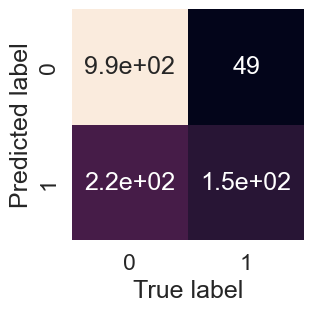

In [47]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True, cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test,y_pred)

### Building, fitting, testing - GridSearchCV Random Forest (After applying SMOTE)

* Precision: 0.57
* Recall: 0.72
* F1 Score: 0.64
* Accuracy: 0.78

In [48]:

grid = {"n_estimators":[200],
       "max_depth":[10],
       "min_samples_split":[2],
       "min_samples_leaf":[4]}

# Training on SMOTE-balanced data
rf_smote = RandomForestClassifier(random_state=42)
gs_model = GridSearchCV(rf_smote,grid,cv = 5,verbose=2)
gs_model.fit(X_train_smote, y_train_smote)
y_pred_smote = gs_model.predict(X_test)


rf_score = gs_model.score(X_test,y_test)
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_smote)
recall = recall_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)

# Print the scores
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {rf_score:.2f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.7s
Precision: 0.57
Recall: 0.72
F1 Score: 0.64
Accuracy: 0.78


In [49]:
print("Classification Report (SMOTE Data):")
print(classification_report(y_test, y_pred_smote))

Classification Report (SMOTE Data):
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1036
           1       0.57      0.72      0.64       373

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409



#### Visualising Confusion matrix

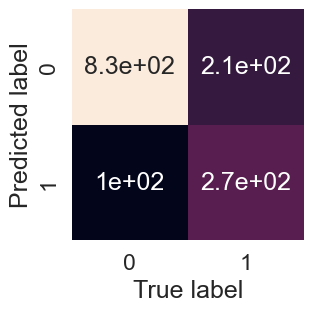

In [50]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True, cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test,y_pred_smote)

### Comparing Final Results

<AxesSubplot: >

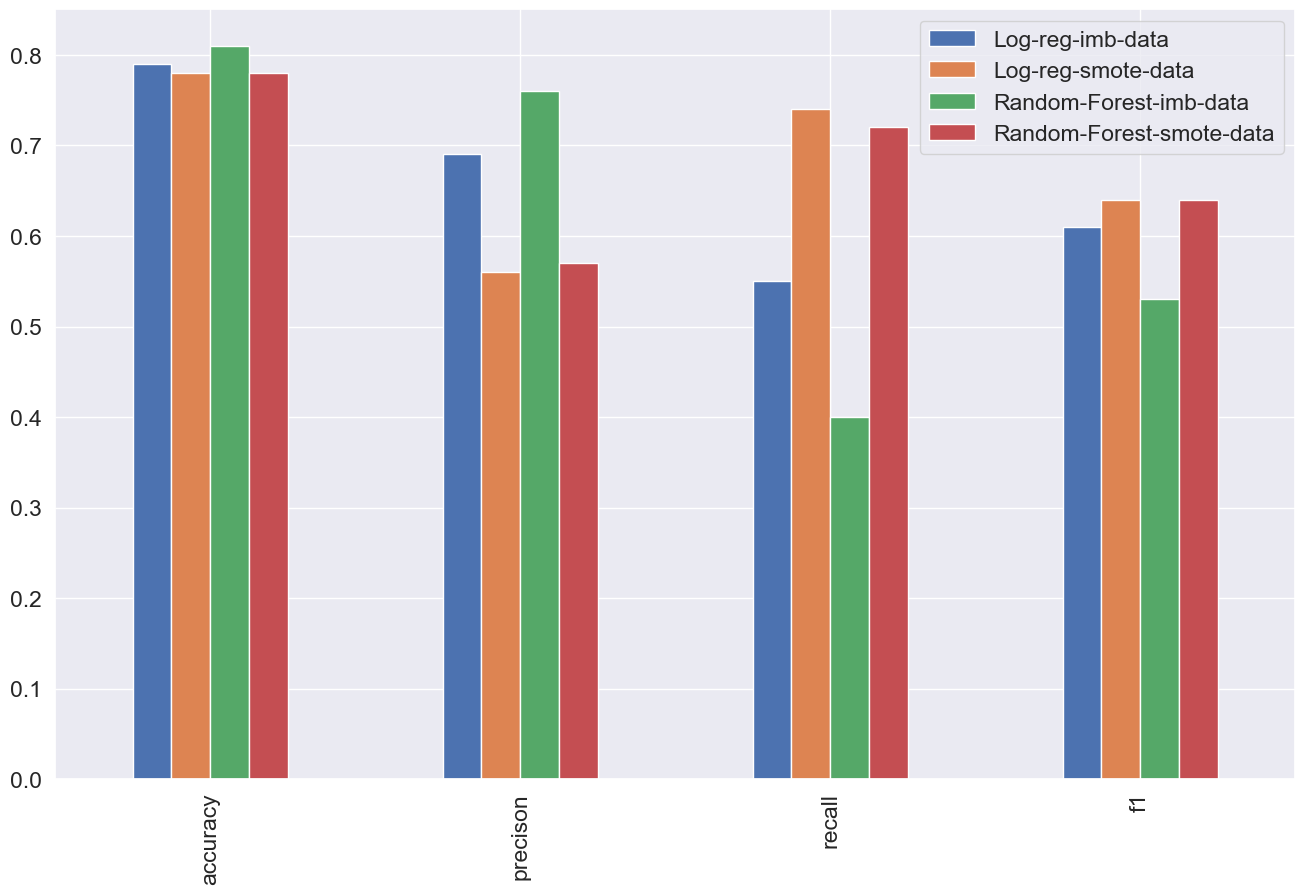

In [54]:
one = {"accuracy":0.79,
               "precison":0.69,
               "recall": 0.55,
               "f1":0.61}

two = {"accuracy":0.78,
               "precison":0.56,
               "recall": 0.74,
               "f1":0.64}

three = {"accuracy":0.81,
               "precison":0.76,
               "recall": 0.40,
               "f1":0.53}

four = {"accuracy":0.78,
               "precison":0.57,
               "recall": 0.72,
               "f1":0.64}

compare_metrics = pd.DataFrame({"Log-reg-imb-data":one,
                               "Log-reg-smote-data":two,
                               "Random-Forest-imb-data":three,
                               "Random-Forest-smote-data":four})
compare_metrics.plot.bar(figsize = (16,10))